In [30]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns

In [31]:
import os
print(os.getcwd())

c:\Users\maili\ProjecteData\Equip_11\Scripts


In [32]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 26062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path)

df_RRHH

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
1,10,13,8,2,1,361,52,3,28,205.917,...,0,1,1,1,0,4,80,172,27,40
2,15,14,11,2,4,291,31,12,40,306.345,...,0,1,1,1,0,1,73,171,25,40
3,20,13,3,6,2,260,50,11,36,343.253,...,0,1,4,1,0,0,65,168,23,40
4,17,11,3,2,2,179,22,17,40,343.253,...,0,2,2,0,1,0,63,170,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,34,19,12,3,4,118,10,10,37,261.306,...,0,1,0,0,0,0,83,172,28,64
1083,22,1,10,4,4,179,26,9,30,265.017,...,0,3,0,0,0,0,56,171,19,64
1084,26,19,5,6,3,300,26,13,43,237.656,...,0,1,2,1,1,1,77,175,25,64
1085,20,19,4,6,3,260,50,11,36,326.452,...,0,1,4,1,0,0,65,168,23,56


# Tasa mensual de absentismo per capita (en horas)

Tasa = (Suma de horas de absentismo del mes) / (Número de empleados activos en el mes)

In [33]:
# Diccionario de nombres de meses
meses = {
    1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril',
    5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto',
    9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
}

df_RRHH = df_RRHH[df_RRHH['Month_absence'].between(1, 12)]

# Agrupar por número de mes
absentismo_kpi = df_RRHH.groupby('Month_absence').agg({
    'Absenteeism_hours': 'sum',
    'ID': pd.Series.nunique
}).rename(columns={'ID': 'Empleados_activos'})

# Añadir columna con nombre del mes
absentismo_kpi['Mes_nombre'] = absentismo_kpi.index.map(meses)

# Calcular tasa
absentismo_kpi['Tasa_per_capita'] = absentismo_kpi['Absenteeism_hours'] / absentismo_kpi['Empleados_activos']

# Reordenar por mes (opcional)
absentismo_kpi = absentismo_kpi.sort_index()

absentismo_kpi

,Absenteeism_hours,Empleados_activos,Mes_nombre,Tasa_per_capita
Month_absence,,,,
1,355,41,enero,8.658537
2,476,55,febrero,8.654545
3,1072,60,marzo,17.866667
4,890,51,abril,17.450980
5,596,50,mayo,11.920000
6,570,44,junio,12.954545
7,1315,58,julio,22.672414
8,377,39,agosto,9.666667
9,468,41,septiembre,11.414634


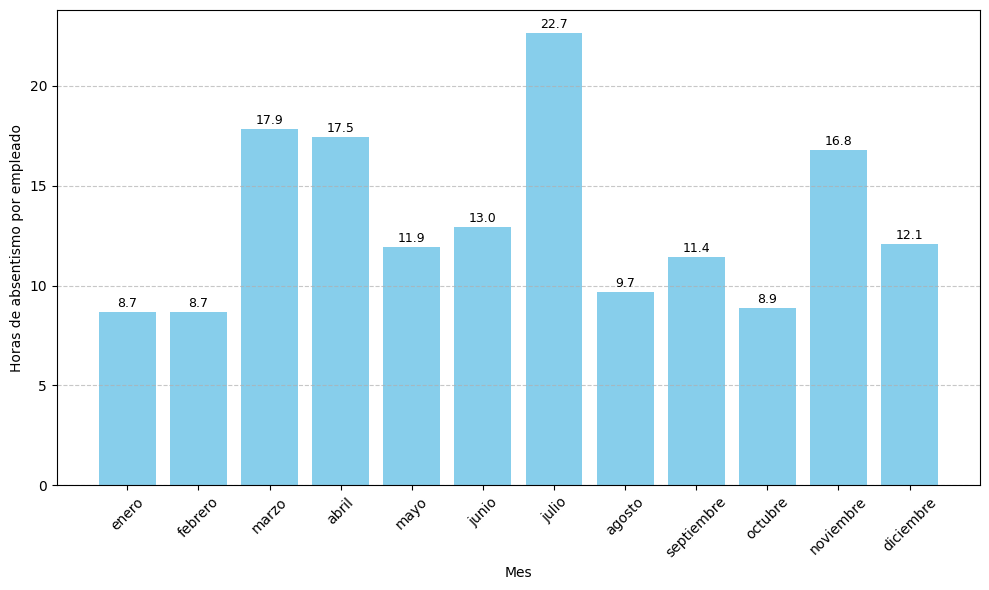

In [34]:
# Orden cronológico
absentismo_kpi = absentismo_kpi.sort_index()

# Datos para el gráfico
x = absentismo_kpi['Mes_nombre']
y = absentismo_kpi['Tasa_per_capita']

# Crear gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(x, y, color='skyblue')

# Etiquetas de valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f"{round(height, 1)}",  # redondear a 1 decimal
        ha='center',
        va='bottom',
        fontsize=9
    )

# Estética

plt.xlabel('Mes')
plt.ylabel('Horas de absentismo por empleado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mes pico de carga por ausencia

Mes pico de carga por ausencias=arg mes max (∑(Horas de absentismo))

In [35]:
# Diccionario de nombres de meses
nombres_meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']

In [36]:
mes_pico = absentismo_kpi['Absenteeism_hours'].idxmax()
peak_hours = absentismo_kpi['Absenteeism_hours'].max()
mes_pico_nombre = nombres_meses[int(mes_pico)-1] if 1 <= int(mes_pico) <= 12 else str(mes_pico)
print(f"Mes pico de carga por ausencias: {mes_pico_nombre} con {peak_hours} horas")

Mes pico de carga por ausencias: Julio con 1315 horas


# Motivo modal de absentismo laboral

Motivo modal de absentismo=arg razon max(Frecuencia de cada motivo de ausencia)

In [37]:
motivo_ausencia = {
    0: 'Sin ausencia',
    1: 'I Enfermedades infecciosas y parasitarias',
    2: 'II Neoplasias',
    3: 'III Enfermedades de la sangre y del sistema inmunológico',
    4: 'IV Enfermedades endocrinas, nutricionales y metabólicas',
    5: 'V Trastornos mentales y del comportamiento',
    6: 'VI Enfermedades del sistema nervioso',
    7: 'VII Enfermedades del ojo y anexos',
    8: 'VIII Enfermedades del oído y apófisis mastoides',
    9: 'IX Enfermedades del sistema circulatorio',
    10: 'X Enfermedades del sistema respiratorio',
    11: 'XI Enfermedades del sistema digestivo',
    12: 'XII Enfermedades de la piel y del tejido subcutáneo',
    13: 'XIII Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    14: 'XIV Enfermedades del sistema genitourinario',
    15: 'XV Embarazo, parto y puerperio',
    16: 'XVI Ciertas afecciones originadas en el período perinatal',
    17: 'XVII Malformaciones congénitas, deformidades y anomalías cromosómicas',
    18: 'XVIII Síntomas, signos y hallazgos clínicos o de laboratorio anormales, no clasificados en otra parte',
    19: 'XIX Lesiones, envenenamientos y otras consecuencias de causas externas',
    20: 'XX Causas externas de morbilidad y mortalidad',
    21: 'XXI Factores que influyen en el estado de salud y contacto con los servicios de salud',
    22: 'Seguimiento de paciente (sin CID)',
    23: 'Consulta médica (sin CID)',
    24: 'Donación de sangre (sin CID)',
    25: 'Examen de laboratorio (sin CID)',
    26: 'Ausencia injustificada (sin CID)',
    27: 'Fisioterapia (sin CID)',
    28: 'Consulta odontológica (sin CID)'
}


In [38]:
# Mapear descripciones
df_RRHH['Motivo_descripcion'] = df_RRHH['Reason_absence'].astype(int).map(motivo_ausencia)

# Filtrar ausencias válidas
valid_absences = df_RRHH[df_RRHH['Reason_absence'] != 0]

# Obtener motivo modal y su frecuencia
modal = valid_absences['Motivo_descripcion'].value_counts().idxmax()
modal_count = valid_absences['Motivo_descripcion'].value_counts().max()
total_absences = valid_absences.shape[0]

# Calcular porcentaje
modal_pct = modal_count / total_absences * 100

# Mostrar resultado
print(f"Motivo modal de absentismo: {modal} ({modal_pct:.1f}%)")

Motivo modal de absentismo: Consulta médica (sin CID) (21.9%)


C:\Users\maili\AppData\Local\Temp\ipykernel_18076\900400771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RRHH['Motivo_descripcion'] = df_RRHH['Reason_absence'].astype(int).map(motivo_ausencia)


# Índice de eficiencia relativa por carga laboral

Indice de eficiencia=  ∑(Hit target) / ∑(Work load Average/day) 
​

In [39]:
numerador = df_RRHH['Hit_target'].sum()
denominador = df_RRHH['Work_load_Average_day'].sum()

indice_eficiencia = numerador / denominador
print(f"Índice de eficiencia: {indice_eficiencia:.2}")

Índice de eficiencia: 0.35
